In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,93388.000000,9.338700e+04,93387.000000,93386.000000,93386.000000,93386.000000,9.338600e+04,9.338600e+04,93386.000000,93386.000000,93386.000000
mean,23346.055939,4.177184e+17,70.434823,48666.525089,38.540144,-90.157910,8.967410e+04,1.349518e+09,38.539998,-90.159589,0.006639
std,13479.401167,1.309747e+18,148.238115,26881.102261,5.077215,13.753088,3.018755e+05,2.296636e+07,5.110347,13.766592,0.081210
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.646251,0.000000
25%,11672.750000,1.800429e+14,9.730000,26041.000000,34.668900,-96.786900,7.430000e+02,1.326563e+09,34.759846,-96.845085,0.000000
50%,23346.000000,3.519607e+15,47.550000,48088.000000,39.371600,-87.456900,2.456000e+03,1.327761e+09,39.370935,-87.362663,0.000000
75%,35019.250000,4.635331e+15,83.130000,72011.000000,41.940400,-80.138100,2.047800e+04,1.372497e+09,41.950349,-80.190431,0.000000
max,46716.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373169e+09,66.669356,-66.955602,1.000000


In [4]:
print(train.shape)
print(test.shape)

(46718, 23)
(46670, 23)


In [5]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  93388.000000  9.338700e+04  93387.000000  93386.000000  93386.000000   
mean   23346.055939  4.177184e+17     70.434823  48666.525089     38.540144   
std    13479.401167  1.309747e+18    148.238115  26881.102261      5.077215   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    11672.750000  1.800429e+14      9.730000  26041.000000     34.668900   
50%    23346.000000  3.519607e+15     47.550000  48088.000000     39.371600   
75%    35019.250000  4.635331e+15     83.130000  72011.000000     41.940400   
max    46716.000000  4.992346e+18  13149.150000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  93386.000000  9.338600e+04  9.338600e+04  93386.000000  93386.000000   
mean     -90.157910  8.967410e+04  1.349518e+09     38.539998    -90.159589   
std       13.753088  3.018755e+05  2.296636e+07    

In [7]:
test.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
46665       46665   2020-07-07 03:52:48  3514897282719543   
46666       46666   2020-07-07 03:52:49  3540075240003197   
46667       46667   2020-07-07 03:52:52      630425673344   
46668       46668   2020-07-07 03:53:26  4124536010991657   
46669       46669   2020-07-07 03:53:44  6011681934117244   

                                   merchant        category     amt  \
0                     fraud_Kirlin and Sons   personal_care    2.86   
1                      fraud_Sporer-Keebler   personal_care   29.84   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                         fraud_Haley Group        misc_pos   60.05   
4                     fraud_Johnston-Casper          travel    3.19   
...                                     ...             ...     ...   
46665                      fraud_Huels-Hahn   gas_transport   87.70   
46666               fraud_Cartwright-Harris     grocery_pos   34.08   
46667                        fraud_Mohr Inc    shopping_pos    3.97   
46668    fraud_Osinski, Ledner and Leuschke     grocery_pos   71.47   
46669                       fraud_Kiehn Inc     grocery_pos  129.86   

           first      last gender                          street  ...  \
0           Jeff   Elliott      M               351 Darlene Green  ...   
1         Joanne  Williams      F                3638 Marsh Union  ...   
2         Ashley     Lopez      F            9333 Valentine Point  ...   
3          Brian  Williams      M     32941 Krystal Mill Apt. 552  ...   
4         Nathan    Massey      M        5783 Evan Roads Apt. 465  ...   
...          ...       ...    ...                             ...  ...   
46665     Steven  Faulkner      M    841 Cheryl Centers Suite 115  ...   
46666  Christian     Johns      M                  892 Solis Neck  ...   
46667      Bryan    Miller      M                411 Laurie Fords  ...   
46668     Sydney   Montoya      F  265 Christian Summit Suite 231  ...   
46669    Kaitlyn      Newm    NaN                             NaN  ...   

           lat      long  city_pop                      job         dob  \
0      33.9659  -80.9355  333497.0      Mechanical engineer  1968-03-19   
1      40.3207 -110.4360     302.0   Sales professional, IT  1990-01-17   
2      40.6729  -73.5365   34496.0        Librarian, public  1970-10-21   
3      28.5697  -80.8191   54767.0             Set designer  1987-07-25   
4      44.2529  -85.0170    1126.0       Furniture designer  1955-07-06   
...        ...       ...       ...                      ...         ...   
46665  42.9580  -77.3083   10717.0           Cytogeneticist  1952-10-13   
46666  44.4477  -93.4252    5211.0   Chief Strategy Officer  1987-01-27   
46667  38.3880  -79.9906     365.0   Special effects artist  1970-03-14   
46668  30.5012  -87.8835   27829.0  Presenter, broadcasting  1954-07-21   
46669      NaN       NaN       NaN                      NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                 ...           ...        ...         ...   
46665  b2494b697e0693e7389d2434b

In [ ]:
train.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time               cc_num  \
0               0   2019-01-01 00:00:18     2703186189652095   
1               1   2019-01-01 00:00:44         630423337322   
2               2   2019-01-01 00:00:51       38859492057661   
3               3   2019-01-01 00:01:16     3534093764340240   
4               4   2019-01-01 00:03:06      375534208663984   
...           ...                   ...                  ...   
15588       15588   2019-01-10 00:19:11     4836998673805450   
15589       15589   2019-01-10 00:20:34     6538891242532018   
15590       15590   2019-01-10 00:21:08     6011603272871604   
15591       15591   2019-01-10 00:21:25  4210078554961359092   
15592       15592   2019-01-10 00:22:39     6011329966782895   

                                     merchant       category     amt  \
0                  fraud_Rippin, Kub and Mann       misc_net    4.97   
1             fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                        fraud_Lind-Buckridge  entertainment  220.11   
3          fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                         fraud_Keeling-Crist       misc_pos   41.96   
...                                       ...            ...     ...   
15588                      fraud_Rau and Sons    grocery_pos  209.38   
15589                 fraud_McGlynn-Jaskolski       misc_pos   28.14   
15590                      fraud_Torp-Labadie  gas_transport   37.12   
15591                     fraud_Stracke-Lemke    grocery_pos  144.65   
15592  fraud_Johnson, Runolfsdottir and Mayer       misc_net    4.90   

           first       last gender                        street  ...  \
0       Jennifer      Banks      F                561 Perry Cove  ...   
1      Stephanie       Gill      F  43039 Riley Greens Suite 393  ...   
2         Edward    Sanchez      M      594 White Dale Suite 530  ...   
3         Jeremy      White      M   9443 Cynthia Court Apt. 038  ...   
4          Tyler     Garcia      M              408 Bradley Rest  ...   
...          ...        ...    ...                           ...  ...   
15588      Susan      Hardy      F               516 Brown Parks  ...   
15589       Jodi  Rodriguez      F       5796 Lee Coves Apt. 286  ...   
15590     Robert    Holland      M          431 Tracy Expressway  ...   
15591    Valerie      Clark      F               7402 West Ranch  ...   
15592     Lauren     Butler      F     030 Seth Divide Suite 355  ...   

           lat      long  city_pop                                    job  \
0      36.0788  -81.1781      3495              Psychologist, counselling   
1      48.8878 -118.2105       149      Special educational needs teacher   
2      42.1808 -112.2620      4154            Nature conservation officer   
3      46.2306 -112.1138      1939                        Patent attorney   
4      38.4207  -79.4629        99         Dance movement psychotherapist   
...        ...       ...       ...                                    ...   
15588  46.0062  -86.2555      6469                    Trade mark attorney   
15589  36.0244  -90.9288      7155  Engineer, control and instrumentation   
15590  33.1410  -84.1759      4138                     Field seismologist   
15591  43.9210 -122.7806      1420                        Systems analyst   
15592  36.0557  -96.0602    413574     Teacher, special educational needs   

              dob                         trans_num   unix_time  merch_lat  \
0      1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1      1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2      1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3      1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4      1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...           ...                               ...         ... 

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [10]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [11]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [12]:
print(train.shape)
print(test.shape)
print(data.shape)

(46718, 23)
(46670, 23)
(93388, 23)


In [13]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0        cc_num  merchant  category     amt  gender  state  \
0           0  2.703186e+15       514         8    4.97       0     26   
1           1  6.304233e+11       241         4  107.23       0     46   
2           2  3.885949e+13       390         0  220.11       1     12   
3           3  3.534094e+15       360         2   45.00       1     25   
4           4  3.755342e+14       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1808 -112.2620  ...  43.1

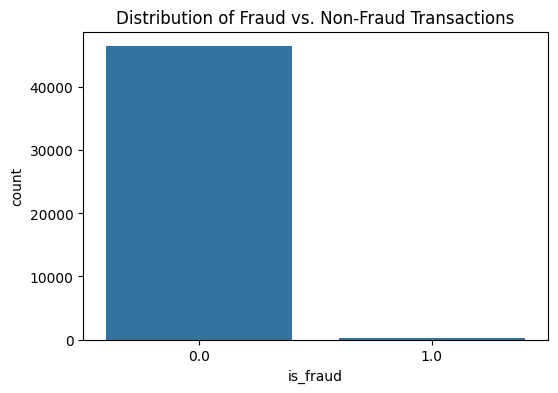

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=test, x='is_fraud')
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.show()

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

15582
0


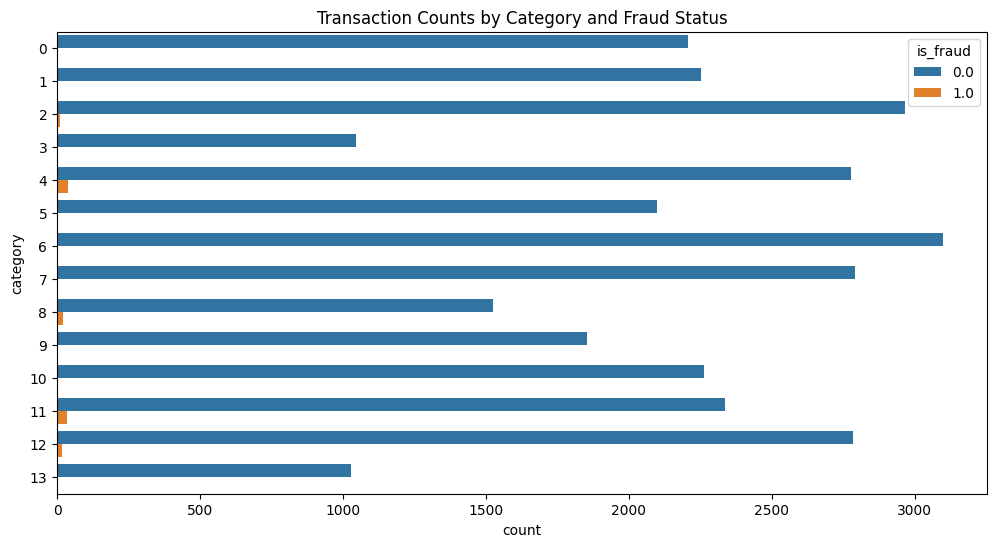

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

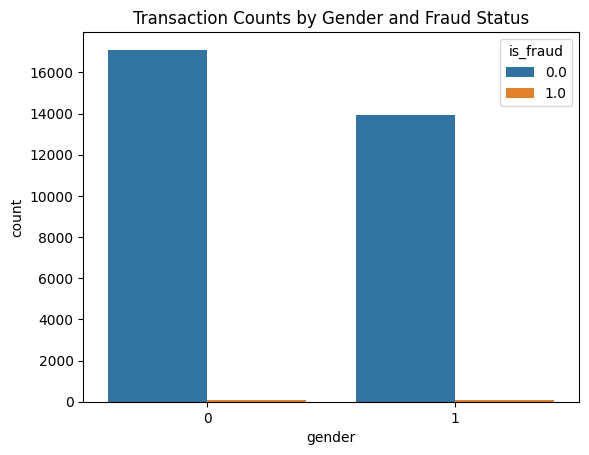

In [ ]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

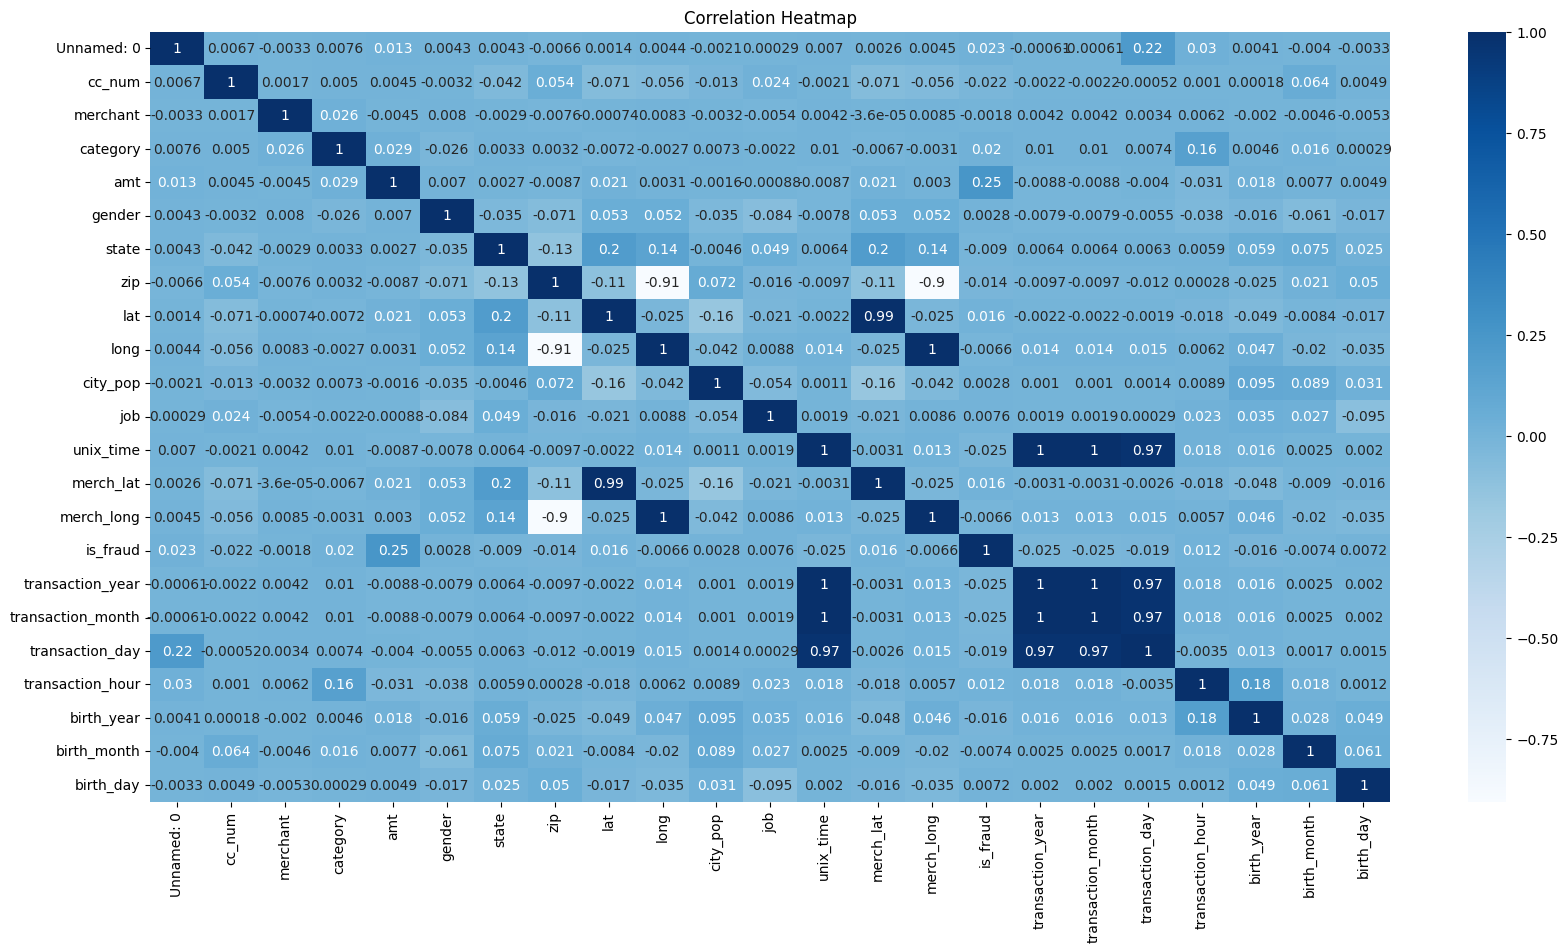

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
logistic_regression = LogisticRegression(solver='saga', max_iter=1000)

In [25]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [33]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [41]:
#Importing the basic librarires for building model  / Classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import UndefinedMetricWarning
import warnings